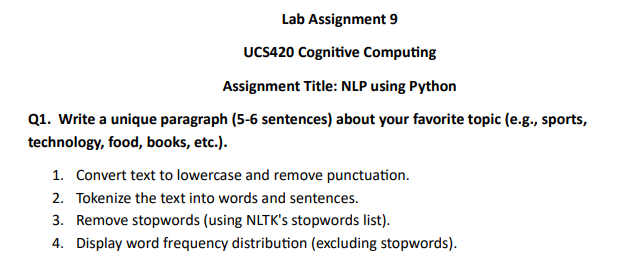

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

text = """I love trying different kinds of food from around the world.
Spicy Indian curries, Italian pasta, and Japanese sushi are some of my favorites.
Food brings people together and creates happy memories.
I also enjoy cooking at home and experimenting with new recipes."""

text = text.lower().translate(str.maketrans('', '', string.punctuation))
words = word_tokenize(text)
sentences = sent_tokenize(text)
stop_words = set(stopwords.words('english'))
filtered = [w for w in words if w not in stop_words]
fdist = FreqDist(filtered)

print("Words:", words)
print("Sentences:", ' '.join(sentences))
print("Filtered Words:", filtered)
print("Word Frequency:", fdist.most_common())


Words: ['i', 'love', 'trying', 'different', 'kinds', 'of', 'food', 'from', 'around', 'the', 'world', 'spicy', 'indian', 'curries', 'italian', 'pasta', 'and', 'japanese', 'sushi', 'are', 'some', 'of', 'my', 'favorites', 'food', 'brings', 'people', 'together', 'and', 'creates', 'happy', 'memories', 'i', 'also', 'enjoy', 'cooking', 'at', 'home', 'and', 'experimenting', 'with', 'new', 'recipes']
Sentences: i love trying different kinds of food from around the world
spicy indian curries italian pasta and japanese sushi are some of my favorites
food brings people together and creates happy memories
i also enjoy cooking at home and experimenting with new recipes
Filtered Words: ['love', 'trying', 'different', 'kinds', 'food', 'around', 'world', 'spicy', 'indian', 'curries', 'italian', 'pasta', 'japanese', 'sushi', 'favorites', 'food', 'brings', 'people', 'together', 'creates', 'happy', 'memories', 'also', 'enjoy', 'cooking', 'home', 'experimenting', 'new', 'recipes']
Word Frequency: [('food',

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


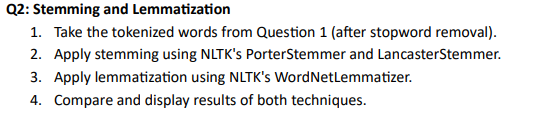

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

text = """I love learning about artificial intelligence and its applications.
AI is transforming industries such as healthcare, finance, and education."""

text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))
words = word_tokenize(text)

stop_words = set(stopwords.words('english'))
filtered = [word for word in words if word not in stop_words]

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

porter_stemmed = [porter.stem(w) for w in filtered]
lancaster_stemmed = [lancaster.stem(w) for w in filtered]
lemmatized = [lemmatizer.lemmatize(w) for w in filtered]

print("Original Words:", filtered)
print("Porter Stemmer:", porter_stemmed)
print("Lancaster Stemmer:", lancaster_stemmed)
print("Lemmatized:", lemmatized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original Words: ['love', 'learning', 'artificial', 'intelligence', 'applications', 'ai', 'transforming', 'industries', 'healthcare', 'finance', 'education']
Porter Stemmer: ['love', 'learn', 'artifici', 'intellig', 'applic', 'ai', 'transform', 'industri', 'healthcar', 'financ', 'educ']
Lancaster Stemmer: ['lov', 'learn', 'art', 'intellig', 'apply', 'ai', 'transform', 'industry', 'healthc', 'fin', 'educ']
Lemmatized: ['love', 'learning', 'artificial', 'intelligence', 'application', 'ai', 'transforming', 'industry', 'healthcare', 'finance', 'education']


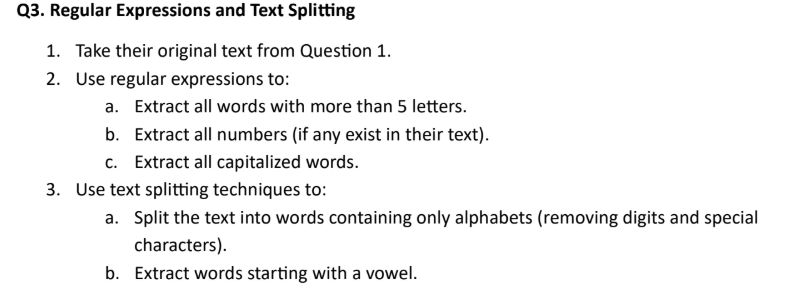

In [7]:
import re

text = """I love learning about artificial intelligence and its applications.
AI is transforming industries such as healthcare, finance, and education."""

more_than_5 = re.findall(r'\b\w{6,}\b', text)
numbers = re.findall(r'\b\d+\b', text)
capitalized = re.findall(r'\b[A-Z][a-z]*\b', text)
only_alphabets = re.findall(r'\b[a-zA-Z]+\b', text)
vowel_words = re.findall(r'\b[aeiouAEIOU]\w*\b', text)

print("Words with more than 5 letters:", more_than_5)
print("Numbers in text:", numbers)
print("Capitalized words:", capitalized)
print("Only alphabet words:", only_alphabets)
print("Words starting with a vowel:", vowel_words)


Words with more than 5 letters: ['learning', 'artificial', 'intelligence', 'applications', 'transforming', 'industries', 'healthcare', 'finance', 'education']
Numbers in text: []
Capitalized words: ['I']
Only alphabet words: ['I', 'love', 'learning', 'about', 'artificial', 'intelligence', 'and', 'its', 'applications', 'AI', 'is', 'transforming', 'industries', 'such', 'as', 'healthcare', 'finance', 'and', 'education']
Words starting with a vowel: ['I', 'about', 'artificial', 'intelligence', 'and', 'its', 'applications', 'AI', 'is', 'industries', 'as', 'and', 'education']


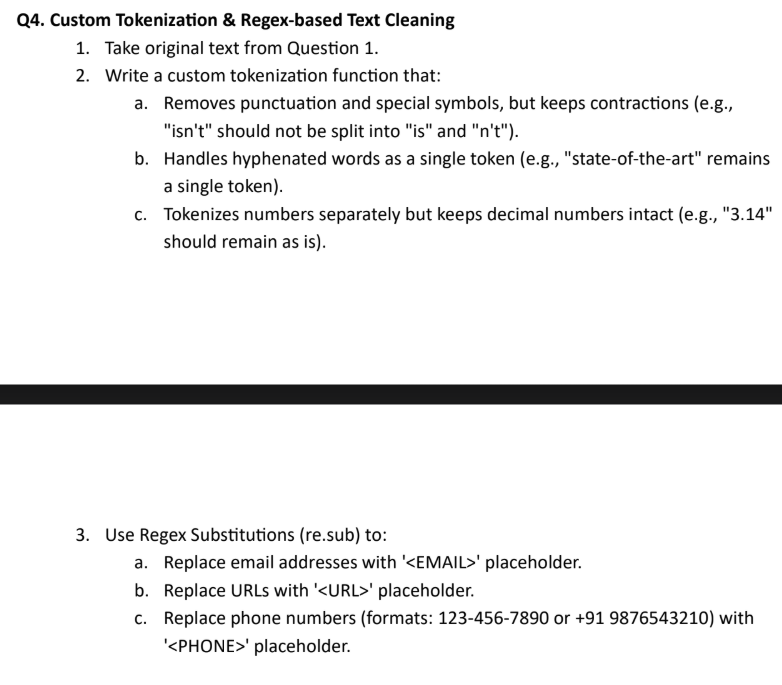

In [15]:
import re

def custom_tokenizer(text):
    text = re.sub(r"[^\w\s'-]", '', text)
    tokens = re.findall(r'\b(?:\w+[-]\w+|\d+\.\d+|\d+|\w+)\b', text)
    return tokens

def clean_text(text):
    text = re.sub(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '<EMAIL>', text)
    text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)
    text = re.sub(r'\+?\d{1,2}\s?(\(?\d{3}\)?[\s\-]?)?[\d\-]{7,}', '<PHONE>', text)
    return text

text = """
John's email is john.doe@example.com, and his website is https://www.johndoe.com.
He can be reached at 123-456-7890 or +91 9876543210.
The project is state-of-the-art and costs $3.14 billion.
"""

tokens = custom_tokenizer(text)
print("Tokens:", tokens)

cleaned_text = clean_text(text)
print("\nCleaned Text:", cleaned_text)


Tokens: ['John', 's', 'email', 'is', 'johndoeexamplecom', 'and', 'his', 'website', 'is', 'httpswwwjohndoecom', 'He', 'can', 'be', 'reached', 'at', '123-456', '7890', 'or', '91', '9876543210', 'The', 'project', 'is', 'state-of', 'the-art', 'and', 'costs', '314', 'billion']

Cleaned Text: 
John's email is <EMAIL>, and his website is <URL>
He can be reached at <PHONE> or <PHONE>.
The project is state-of-the-art and costs $3.14 billion.

